<b>Audio and Music Processing Lab - Module 6</b><br>Andrea Poltronieri<br>andrea.poltronieri@upf.edu<br>05.03.2025
## AMPLab2 - Introduction to music21

In [14]:
from music21 import converter, interval, note, stream

### Working with jingju scores

We are going to work with the vocal part of a jingju score. So let's save it in a variable `p`.

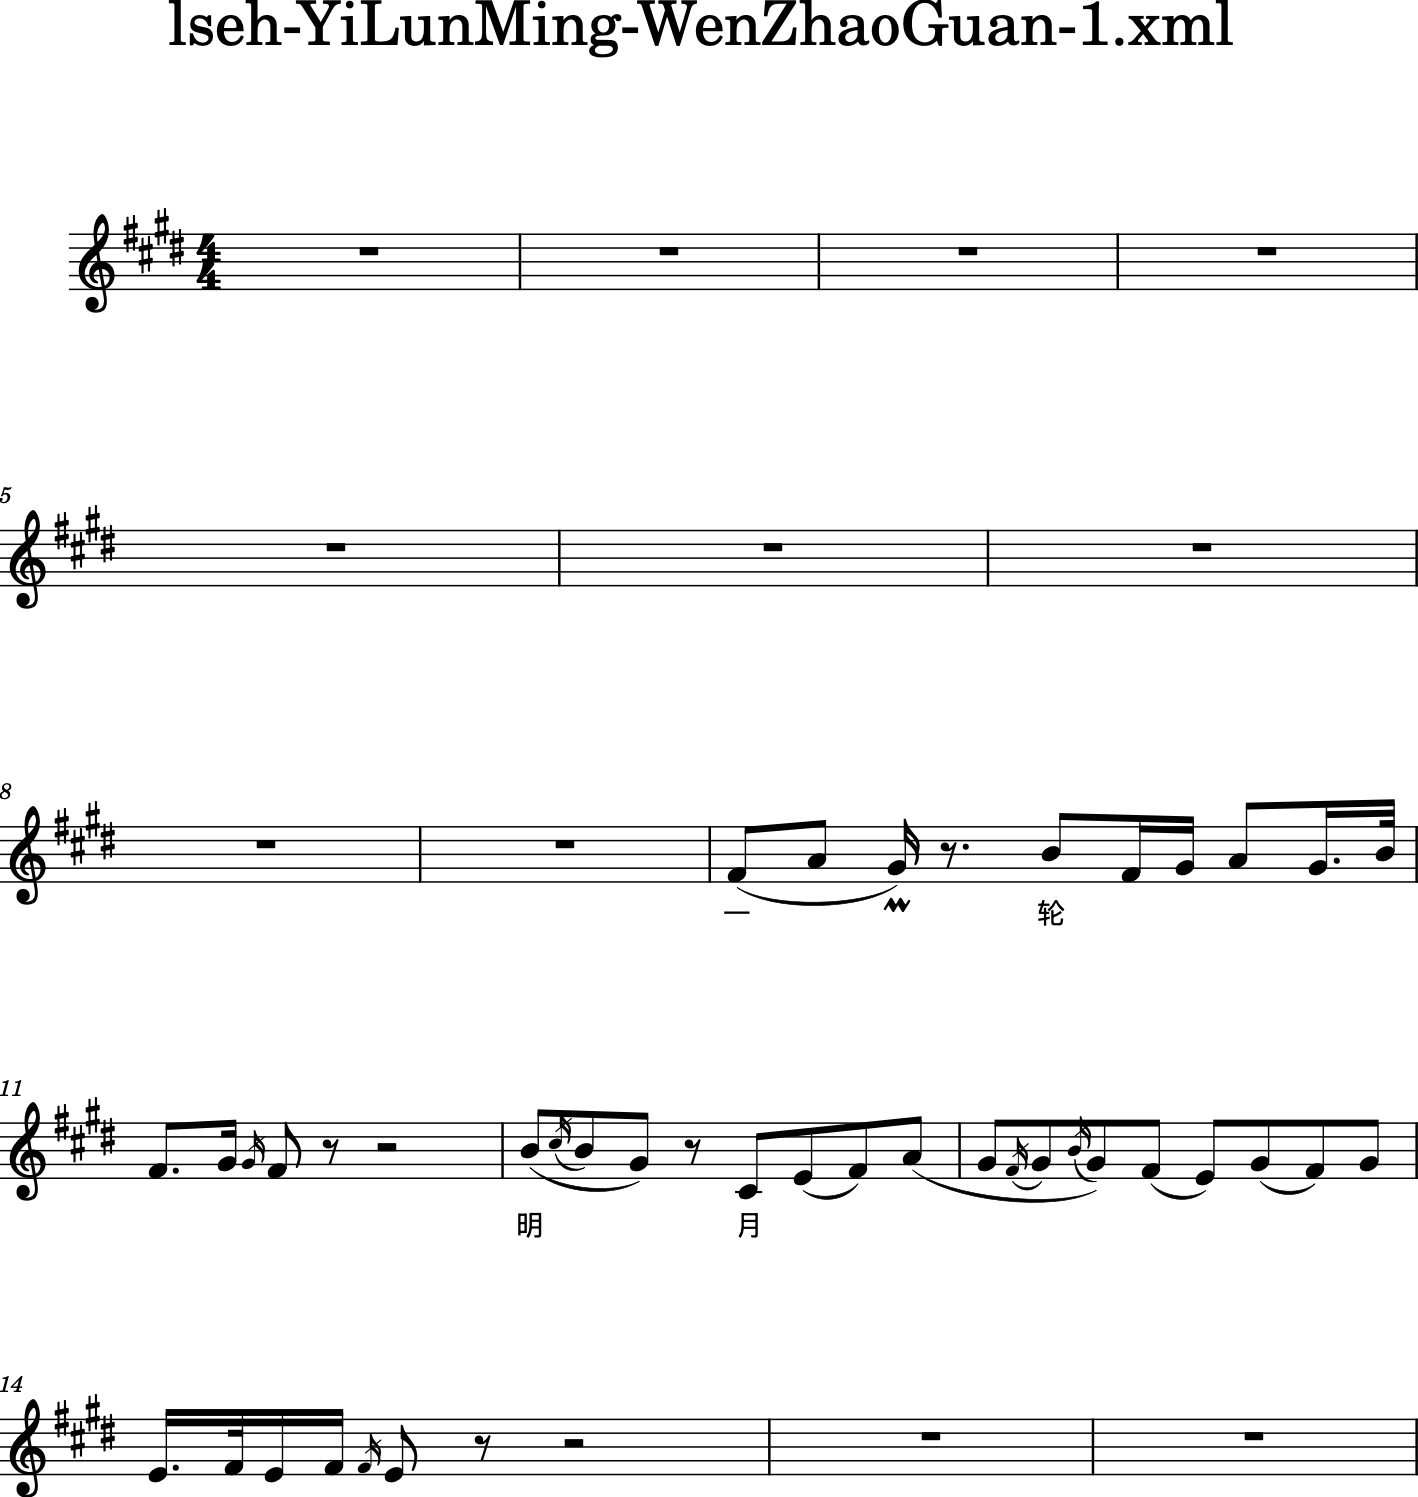

In [26]:
s = converter.parse("lseh-YiLunMing-WenZhaoGuan-1.xml")
pp = s.parts  # all the parts from the score
p = pp[0]  # in this score, the vocal part is the first one
p.show()

To work with the music, we should focus on the notes, which are contained in the measures. So let's retrive all measures and notes and save them respectively in the variables `mm` and `nn` using the `.getElementsByClass` method.
<br/>
As always, everything retrieved should be saved as a stream.

In [27]:
mm = p.getElementsByClass("Measure").stream()  # all the measures from the part
nn = p.getElementsByClass("Note").stream()  # all the notes from the part
print("Measures in the part:", len(mm))
print("Notes in the part:", len(nn))

Measures in the part: 437
Notes in the part: 0


As you can see, no notes were retrieved. This is due to the fact that notes are not contained in the part (`p`), but in each of its measures. So, in order to retrieve all the notes, we can apply the `.getElementsByClass` method in a `for` loop.

In [28]:
nn = stream.Stream()  # create a stream to store all the notes
for m in mm:
    for n in m.getElementsByClass("Note").stream():
        nn.append(n)
print("Notes in the part:", len(nn))

Notes in the part: 1175


Since working with notes is the goal of music21, it conveniently offers the `.notes` attribute precisely for that.

In [29]:
nn = stream.Stream()
for m in mm:
    for n in m.notes.stream():  # NOTE: .notes
        nn.append(n)
print("Notes in the part", len(nn))

Notes in the part 1175


As with the case of `.getElementsByClass`, the `.notes` attribute only retrives notes from the stream to which it is applied.

In [30]:
nn = p.notes.stream()
print("Notes in the part", len(nn))

Notes in the part 0


However, music21 offers the `.flatten()` method that allows for searching recursively in the streams contained in the stream to which it is applied.

In [31]:
nn = p.flatten().notes.stream()  # NOTE: .flatten()
print("Notes in the part", len(nn))

Notes in the part 1175


Now we have all the notes (and only the notes, no rests) stored in the stream `nn` that we created. Since we only stored notes there, there is no information about key nor time signature.

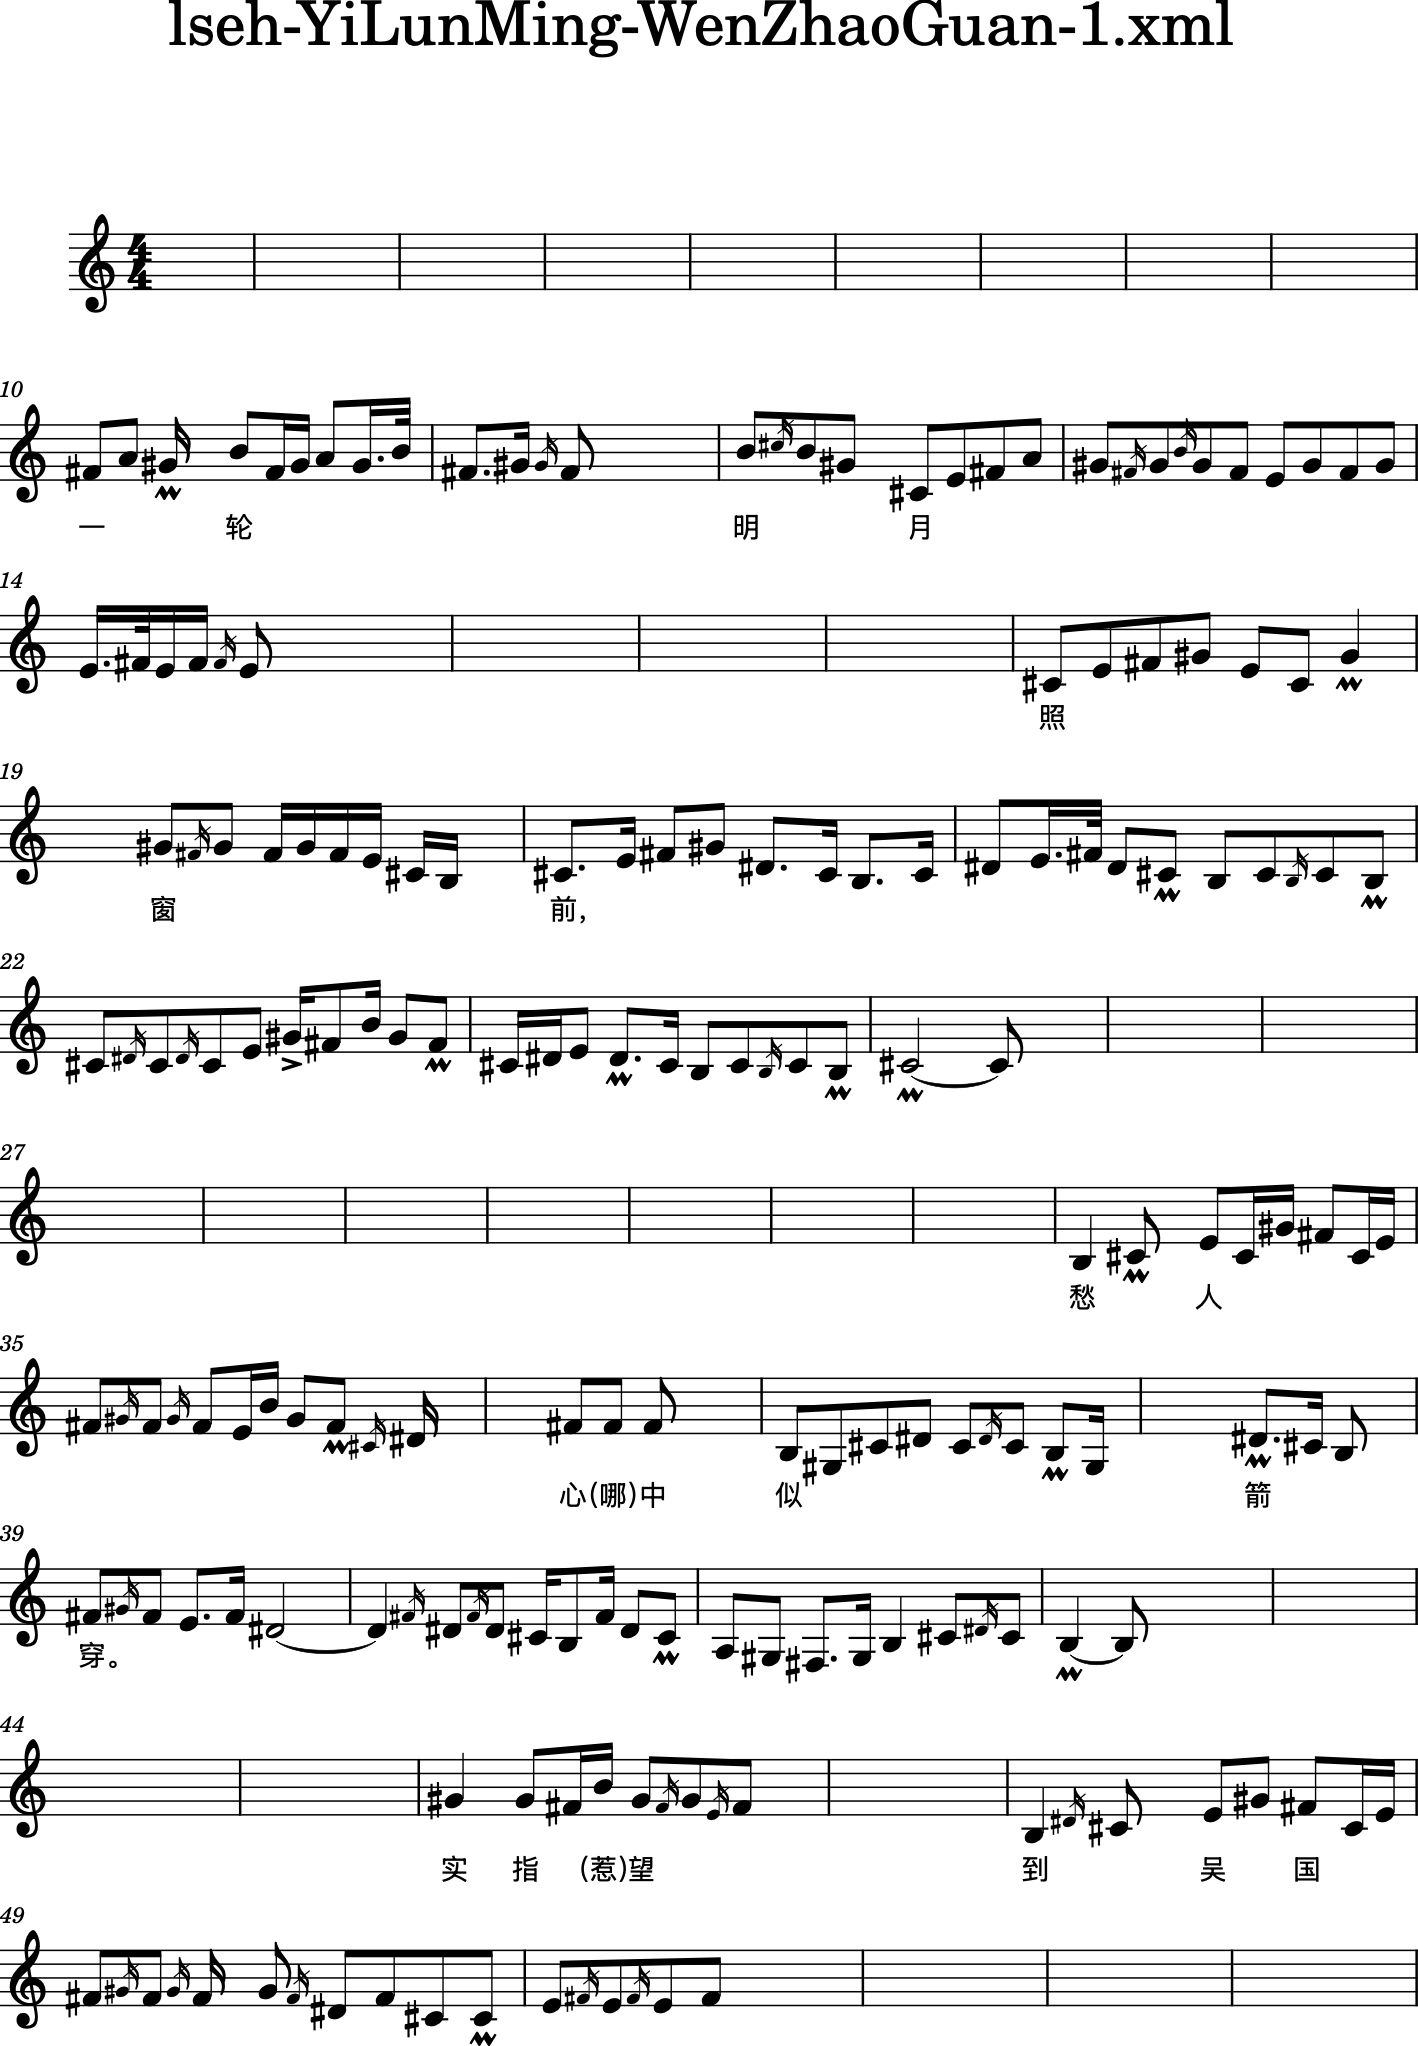

In [32]:
nn.show()

Interestingly, using the `.flatten()` attribute, the notes now relate their offset to the stream `nn`. Therefore, their offset is given with respect to the whole score.

In [33]:
print("The first note of this part is in offset", nn[0].offset)

The first note of this part is in offset 0.0


Jingju arias usually have *banshi* changes, which are indicated in the score by a change of time signature. Let's see if this is the case.

In [34]:
tSs = (
    p.flatten().getElementsByClass("TimeSignature").stream()
)  # NOTE: .flatten() is required
print("This score contains {} time signatures".format(len(tSs)))

This score contains 2 time signatures


Let's look at these time signatures

In [35]:
for tS in tSs:
    print(
        str(tS.numerator) + "/" + str(tS.denominator),
        "in measure",
        tS.measureNumber,
        "at offset",
        tS.offset,
    )

4/4 in measure 1 at offset 0.0
2/4 in measure 135 at offset 536.0


In [36]:
m = p.measure(135)
tS = m.getElementsByClass("TimeSignature").stream()[0]
tS.offset

0.0

#### Working with intervals

Intervals are a special type of object in music21 that has to be created from two notes. Let's explore the interval between the first 2 notes of this part.

In [37]:
n0 = nn[0]
n1 = nn[1]
itv1 = interval.Interval(n0, n1)
print(itv1)
print(
    "Interval from {} to {}".format(
        itv1.noteStart.nameWithOctave, itv1.noteEnd.nameWithOctave
    )
)  # NOTE: .noteStart and .noteEnd
print("Name of the interval:", itv1.name)
print("Simple name:", itv1.simpleName)
print("Nicer name:", itv1.niceName)
print("Interval semitones:", itv1.semitones)  # NOTE: .semitones
print("Interval cents:", itv1.cents)  # NOTE: .cents

AttributeError: 'Rest' object has no attribute 'pitch'

Sometimes we need to know the direction of the interval. Let's compare the previous interval with the one formed by the next to notes in the part.

In [ ]:
n2 = nn[2]
itv2 = interval.Interval(n1, n2)
print(
    "Direction of the interval from {} to {}: {}".format(
        itv1.noteStart.nameWithOctave, itv1.noteEnd.nameWithOctave, itv1.direction.name
    )
)  # NOTE: .direction
print(
    "Direction of the interval from {} to {}: {}".format(
        itv2.noteStart.nameWithOctave, itv2.noteEnd.nameWithOctave, itv2.direction.name
    )
)  # NOTE: .direction

There are different ways to work with interval direction.

In [ ]:
print(
    "Name of the interval:\t", itv2.name, "\t\t", itv2.directedName
)  # NOTE: .directedName
print(
    "Simple name:\t\t", itv2.simpleName, "\t\t", itv2.directedSimpleName
)  # NOTE: .directedSimpleName
print(
    "Nicer name:\t\t", itv2.niceName, "\t", itv2.directedNiceName
)  # NOTE: .directedNiceName
print("Interval semitones:", itv2.semitones)
print("Interval cents:", itv2.cents)

#### Extra functionalities with notes

If we need to work with pairs of consequtive notes (for example, to analyse the intervals in a piece), music21 conveniently offers the methos `.previous()` and `.next()` to retrive respectively the previous and following notes.

In [38]:
print(
    "{} is preceded by {} and followed by {}".format(
        n1.name, n1.previous().name, n1.next().name
    )
)  # NOTE: .previous() and .next()

F# is preceded by rest and followed by A


We can change the color of a note, in case, for example, that we need to find particular ones in the score.

To test this functionality, let's **search for all the perfect fourths** in the score, and color the first note in red, and the second in purple.

This part conatins 56 perfect fourths


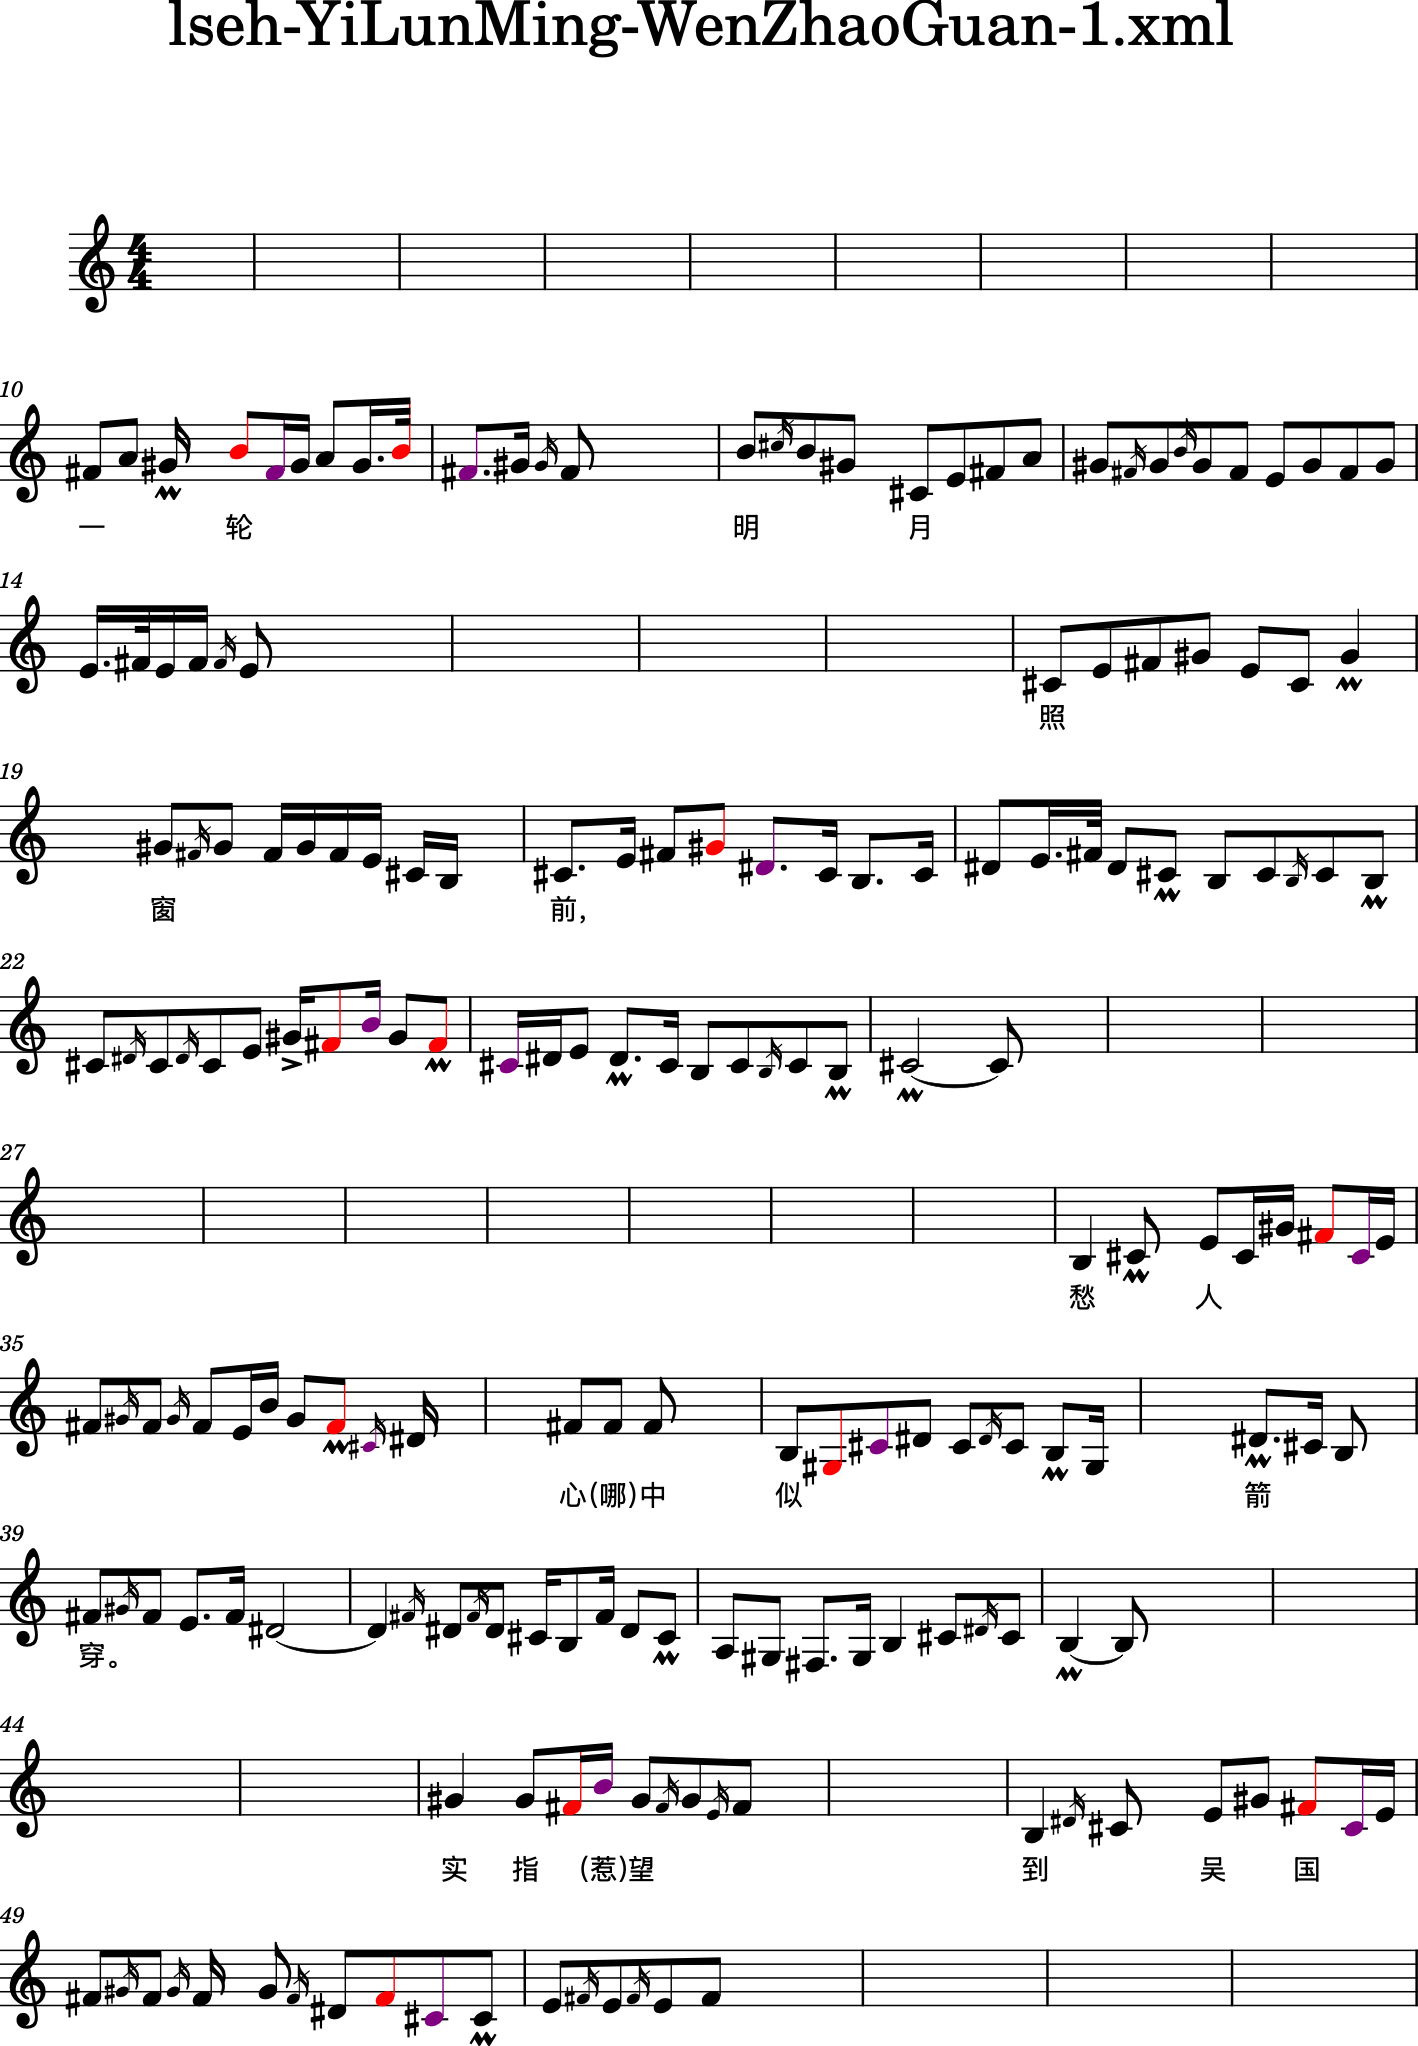

In [41]:
p4count = 0  # let's also count how many intervals are present in the part.

for n in nn[:-1]:
    # check if n is a note and n.next() is a note
    if not (isinstance(n, note.Note) and isinstance(n.next(), note.Note)):
        continue
    itv = interval.Interval(n, n.next())
    if itv.name == "P4":
        itv.noteStart.style.color = "red"  # NOTE: .style.color
        itv.noteEnd.style.color = "purple"  # NOTE: .style.color
        p4count += 1

print("This part conatins {} perfect fourths".format(p4count))

nn.show()

When we retrieve an object using methods such as `.getElementsByClass` or `.notes`, we create a reference to the original one, not a new object. Therefore, the changes we do to it affect the original object.

In [ ]:
s.show("xml")

*NOTE*: when music21 loads this file, some problem is created for the visualisation of the whole score (variable `s`) within the Jupyter Notebook, that's why I called `.show('xml')`, to open the socre directly in MuseScore.

If you pay attention to the results, you'll see that some intervals where found in which there is a rest between the two notes that form it. This might be not perceived as an interval by the listener.
<br/>
This is due to fact that when we call the `.notes` attribute, it only retrieves notes, and only notes, not rests. If we need to consider rests, we should use the `.notesAndRests` method.

In [42]:
nr = p.flatten().notesAndRests.stream()
# nr.show()
print("This part contains {} notes".format(len(nn)))
print("This part contains {} notes and rests".format(len(nr)))

This part contains 1321 notes
This part contains 1510 notes and rests


Let's search again for perfect fourths using this new approach. However we will need to load the score again. Otherwise, all the notes whose color was changed previously, will continue with their new color.

This part contains 56 perfect fourths


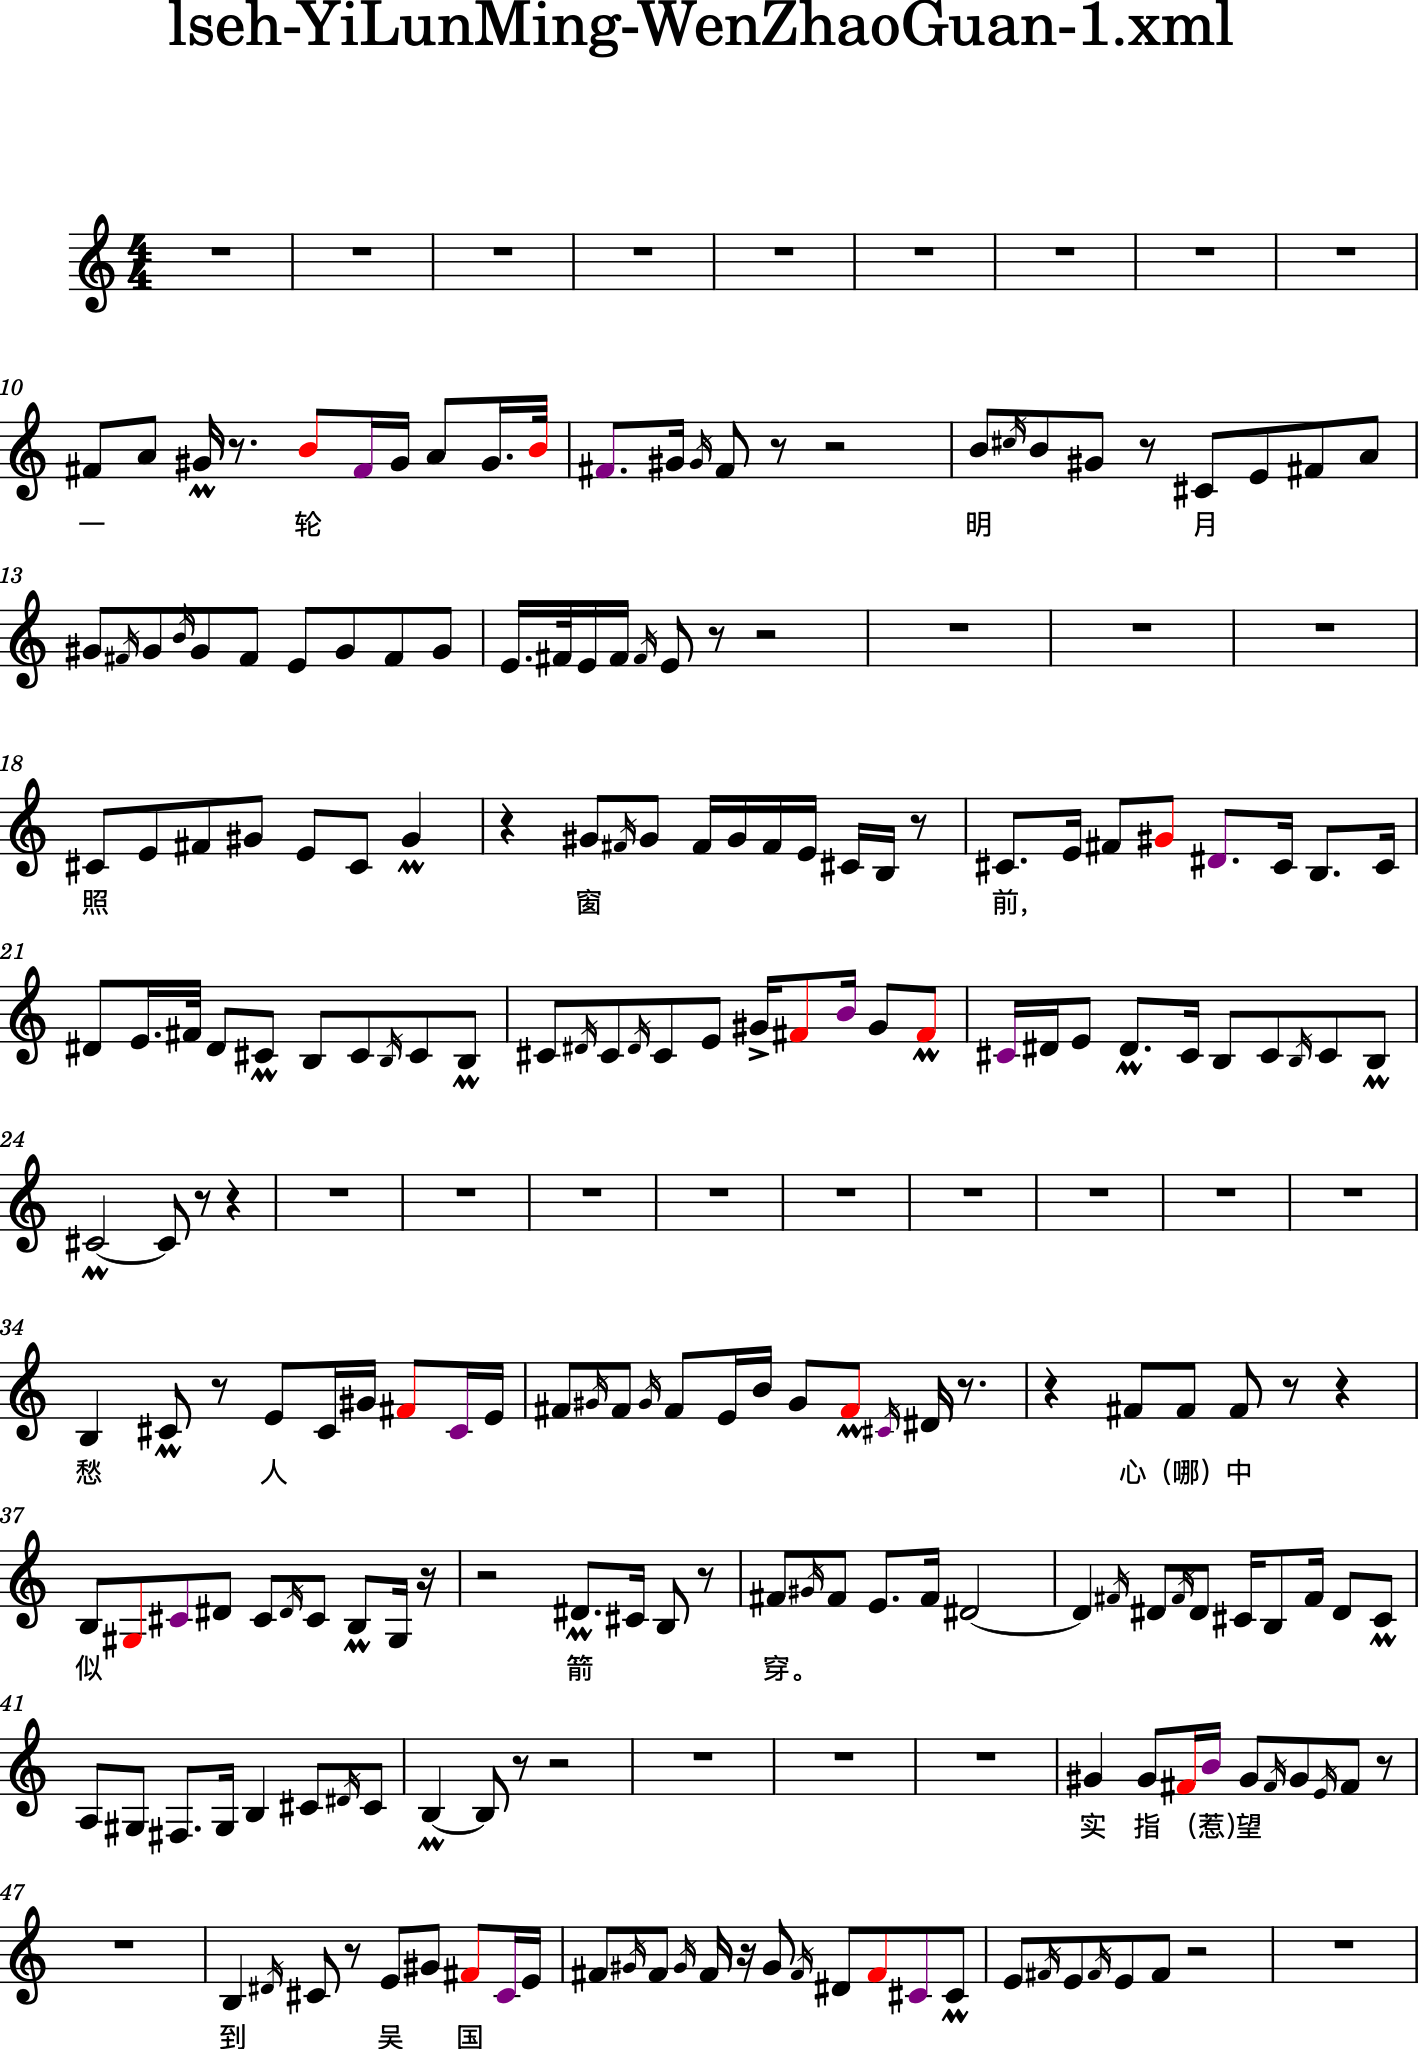

In [43]:
s = converter.parse("lseh-YiLunMing-WenZhaoGuan-1.xml")
p = s.parts[0]
nr = p.flatten().notesAndRests.stream()

p4count = 0

for x in nr[:-1]:
    if x.isNote and x.next().isNote:  # NOTE: .isNote
        itv = interval.Interval(x, x.next())
        if itv.name == "P4":
            itv.noteStart.style.color = "red"
            itv.noteEnd.style.color = "purple"
            p4count += 1

print("This part contains {} perfect fourths".format(p4count))

nr.show()

<br/>

Jingu scores have two parts, one vocal and one instrumental. Few of them even have three parts, two vocal parts, and one instrumental part. However, different sources have the vocal part on top, while others have it as the second part. If you work with a collection of scores, you might need to know which part is the vocal one and which one is the instrumental one. A possible way for automatizing this is by searching for the part with lyrics.
<br/>
This is my way of doing it:

In [44]:
s = converter.parse("lseh-YiLunMing-WenZhaoGuan-1.xml")

vocalParts = []
instrumentalPart = []

# the basic idea is to search for the part(s) that contains lyrics

for p in s.parts:
    nn = p.flatten().notes.stream()  # to look for lyrics, only notes are needed

    # sometimes the vocal part starts with grace notes,
    # but lyrics are only attached to main notes
    # so initial grace notes should be discarded
    i = 0  # note index
    n = nn[i]
    while n.quarterLength == 0:
        i += 1
        n = nn[i]
    if n.lyric != None:
        vocalParts.append(p)
    else:
        instrumentalPart.append(p)

print(
    "There is {} vocal part and {} instrumental part".format(
        len(vocalParts), len(instrumentalPart)
    )
)

# vocalParts[0].show()

print(vocalParts[0])
print(instrumentalPart[0])

There is 1 vocal part and 1 instrumental part
<music21.stream.Part Piano>
<music21.stream.Part Piano>


### Working with makam scores
Most of makam scores have non standard key signatures, and this might cause problems.

In [ ]:
makamScore = "hicaz--sarki--aksaksemai--sezdim_dargin--rifat_ayaydin.xml"
s = converter.parse(makamScore)

/Users/andreapoltronieri/Documents/Projects/AMPLab6/.venv/lib/python3.9/site-packages/music21/musicxml/xmlToM21.py:1986: MusicXMLWarning: The following exception took place in m. 10 in part Music.
  warnings.warn(


AccidentalException: slash-flat is not a supported accidental type

Music21 was not developed with makam music in mind, and many of the accidentals used in makam music are not recognized by music21.

Looking at the error message, it seems that the problem lies in the so called `nonTraditionalKeySignature`. If this is the problem when loading some of the makam scores with music21, one solution might be to manipulate the MusicXML file to get rid of the key signature.

I use the Python module `ElementTree` to find it.

In [16]:
import xml.etree.ElementTree as ET

tree = ET.parse(makamScore)
root = tree.getroot()

notes = []
accidentals = []

for k in root.iter("key"):
    for ks in k.findall("key-step"):
        notes.append(ks.text)
    for ka in k.findall("key-accidental"):
        accidentals.append(ka.text)

print("The key signature of this score has:")
for i in range(len(notes)):
    print("-", notes[i], accidentals[i])

The key signature of this score has:
- B slash-flat
- F sharp
- C sharp


Now I can remove it from the MusicXML file and create a new file without key signature.

In [17]:
for att in root.iter("attributes"):
    if att.find("key") != None:
        att.remove(att.find("key"))

newMakamScore = makamScore[:-4] + "--noKeySignature.xml"

tree.write(newMakamScore)

And now, music21 will load the score

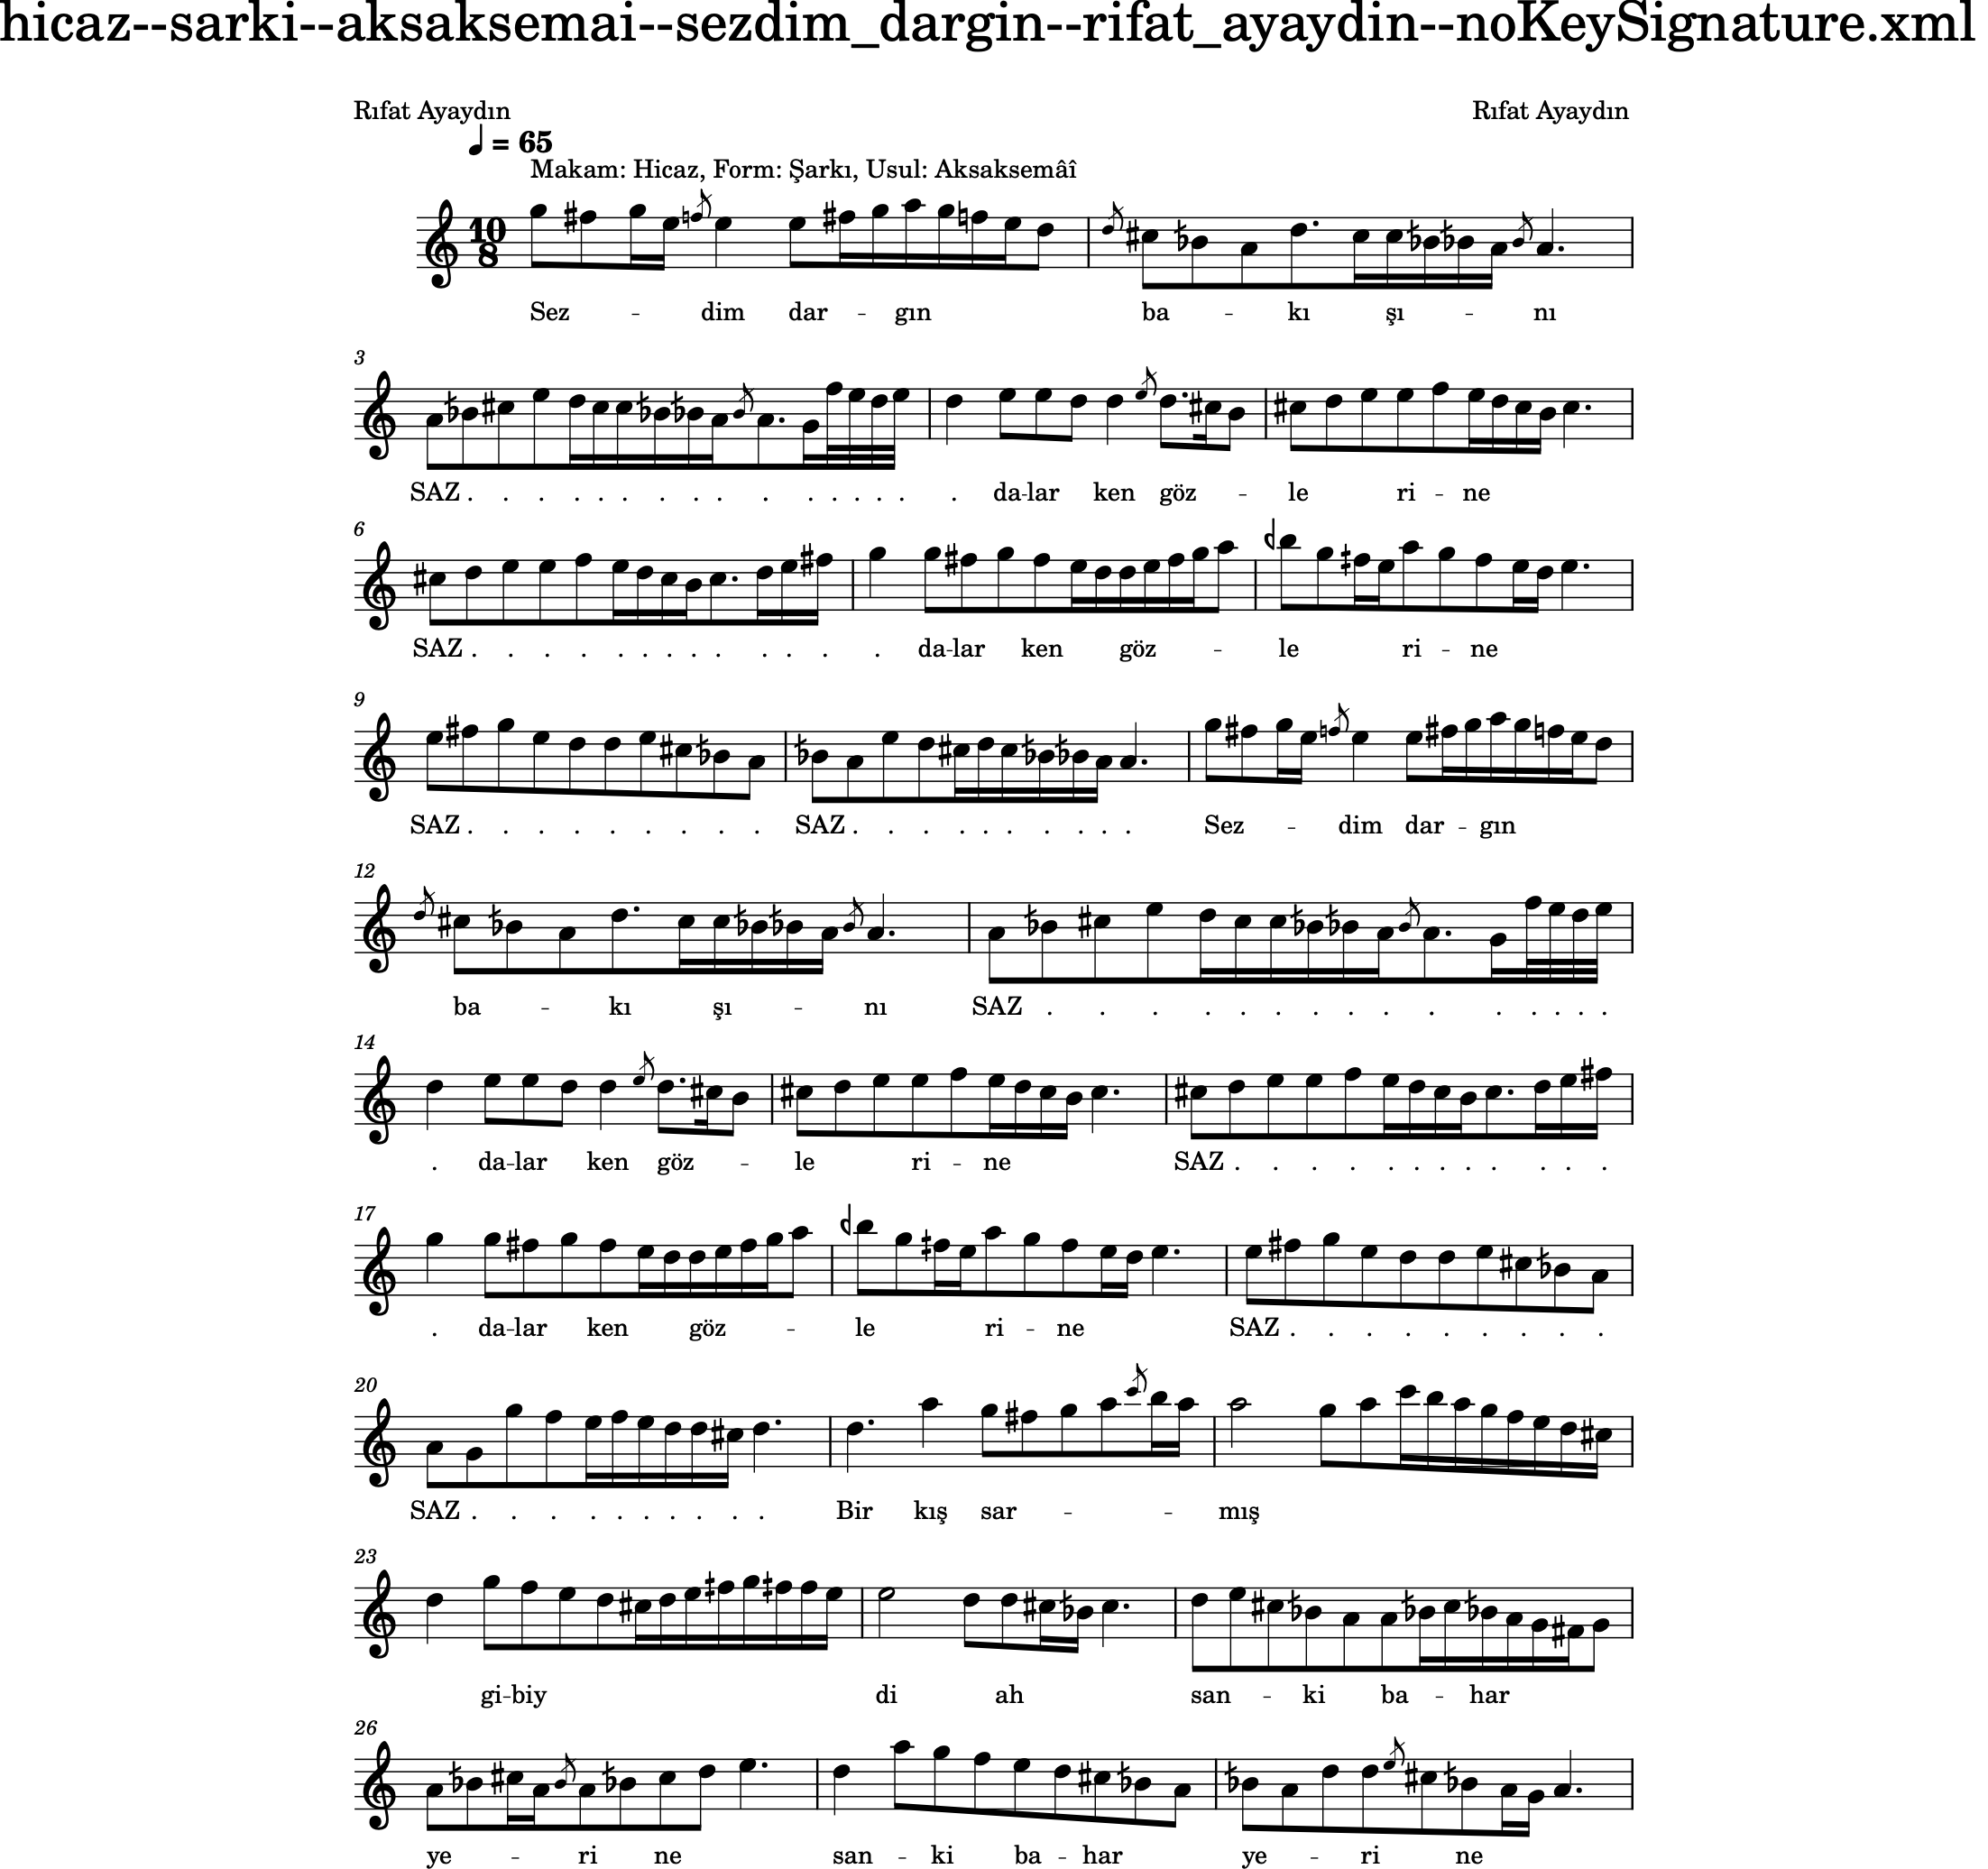

In [18]:
s = converter.parse(newMakamScore)
s.show()

If you want to work in a rythm related task, then you are ready to go. However, if you want to work in a pitch related task, you might still need to do some preprocessing step. As mentioned previously, music21 was not developed with makam music in mind, so not all the accidentals used in this music tradition are accepted by music21.

Let's see which ones are accepted and which are not.

music21 doesn't accept double-slash-flat as accidental
music21 doesn't accept slash-flat as accidental
music21 doesn't accept slash-quarter-sharp as accidental
music21 doesn't accept slash-sharp as accidental


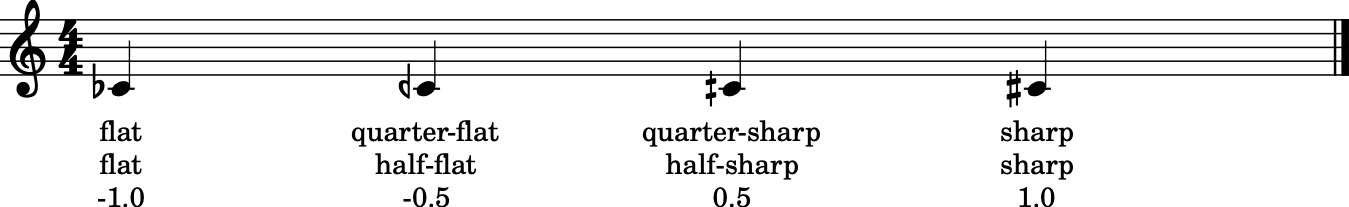

In [19]:
# these are the names of all the accidentals used in makam scores, as contained in the MusicXML files
makamAccidentals = [
    "double-slash-flat",
    "flat",
    "slash-flat",
    "quarter-flat",
    "quarter-sharp",
    "sharp",
    "slash-quarter-sharp",
    "slash-sharp",
]

# create a stream to contained altered notes
makamNotes = stream.Stream()

for i in range(len(makamAccidentals)):  # create a note per accidental
    try:
        n = note.Note()
        n.pitch.accidental = makamAccidentals[i]  # add one accidental from the list
        n.addLyric(makamAccidentals[i])  # add the name of the accidental as lyric
        n.addLyric(n.pitch.accidental.name)  # add the name used by music21 as lyric
        n.addLyric(
            n.pitch.alter, applyRaw=True
        )  # add the number of semitones of the accidental as lyric
        makamNotes.append(n)
    except:
        print("music21 doesn't accept {} as accidental".format(makamAccidentals[i]))

makamNotes.show()

Interestingly, if loaded from an xml file, the name of the accidentals are kept, but some can be renamed:

In [20]:
accidentals_xml = []

for a in root.iter("accidental"):
    if a.text not in accidentals_xml:
        accidentals_xml.append(a.text)

print("The accidentals contained in the MusicXML file are:")
for accidental in sorted(accidentals_xml):
    print("-", accidental)

The accidentals contained in the MusicXML file are:
- quarter-flat
- quarter-sharp
- sharp
- slash-flat


In [21]:
accidentals_music21 = []

# retrieve all the notes from the score
nn = s.flatten().notes.stream()

# search for all the accidental names
for n in nn:
    if n.pitch.accidental:
        if n.pitch.accidental.name not in accidentals_music21:
            accidentals_music21.append(n.pitch.accidental.name)

print("The accidentals parsed by music21 are:")
for accidental in sorted(accidentals_music21):
    print("-", accidental)

The accidentals parsed by music21 are:
- half-flat
- half-sharp
- sharp
- slash-flat


As you can see, `slash-flat` is a type of accidental that music21 should not accept, but the name is kept when imported from an xml file! Let's look for a note with this accidental, and see its attributes:

In [22]:
for n in nn:
    if n.pitch.accidental and n.pitch.accidental.name == "slash-flat":
        break

print("Note name:", n.name)
print("Pitch accidental:", n.pitch.accidental.name)
print("Alter:", n.pitch.accidental.alter)

Note name: B
Pitch accidental: slash-flat
Alter: 0.0


So, even though the name of the accidental is kept, it has no effect on the pitch. However, knowing the name of the accidental, I can assign to it the value I want using the `.microtone` atribute of the `.pitch` object in the note. I can use that attribute to set a value in cents that modifies the original pitch of the note.

Note that the microtone affects the `.pitch` object, and not the `.accidental` object contained in `.pitch`.

In [23]:
# deviation from original pitch of slash-flat in cents
tone = 200  # cents
slashFlatAlter = -(4 * tone / 9)

# assign that deviation to notes with slash-flat
for n in nn:
    if n.pitch.accidental and n.pitch.accidental.name == "slash-flat":
        n.pitch.microtone = slashFlatAlter

Now, let's search again the first note with a slash-flat accidental, and retrieve its attributes. Remember that the modified object is `.pitch` and not `.accidental`

In [24]:
for n in nn:
    if n.pitch.accidental and n.pitch.accidental.name == "slash-flat":
        break

print("Note name:", n.nameWithOctave)
print("Pitch accidental:", n.pitch.accidental.name)
print("Alter of the accidental:", n.pitch.accidental.alter)
print("Alter of pitch:", n.pitch.microtone.cents)

Note name: B4
Pitch accidental: slash-flat
Alter of the accidental: 0.0
Alter of pitch: -88.88888888888889


This new alter in pitch affects the intervals created using that note.

In [25]:
for n in nn:
    if n.pitch.accidental and n.pitch.accidental.name == "slash-flat":
        itv = interval.Interval(n, n.next())
        print("Notes of the interval: {} and {}".format(n.name, n.next().name))
        print("Interval:", itv.name)
        print("Cents of the interval:", itv.cents)
        break

Notes of the interval: B and A
Interval: m2
Cents of the interval: -111.11111


This is just a suggestion about how to deal with pitch in makam scores. The important message to take is that the name of the accidentals are kept, and you can use that to "alter" their pitch in the manner you find more useful for your research. You might even want to alter the pitch value of all notes with accidental to adjust it to the characteristics of makam music.